### EXPLORATORY DATA ANALYSIS CASE STUDY: ROAD TRAFFIC ACCIDENTS

###**Intoduction**
Road traffic accidents are a major cause of injuries and fatalities worldwide. Understanding the patterns and factors influencing these accidents through data analysis can help policymakers and organizations develop preventive measures. This case study involves performing Exploratory Data Analysis (EDA) on road traffic accident datasets to uncover key insights.

##### **Primary Objective:** To analyse traffic accident data to identify trends,correlations and potential causes of accidents.


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset

data = pd.read_csv('/content/traffic_accidents_dict new.csv')
data

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,Variable,Description
0,20,4.3709,2.3049,753.000,0.7700,1,321.5920,1.1944,290.8570,160.4320,accidents,"Number of recorded accidents, as a positive in..."
1,11,9.5564,3.2757,5.452,4.0540,1,478.6230,6.2960,931.8120,8.9108,traffic_fine_amount,"Traffic fine amount, expressed in thousands of..."
2,19,7.5879,2.0989,6.697,345.0000,0,364.4760,2.8584,830.0860,5.5727,traffic_density,"Traffic density index, scale from 0 (low) to 1..."
3,23,6.3879,4.9188,9.412,4.7290,0,20.9200,2.1065,813.1590,131.4520,traffic_lights,Proportion of traffic lights in the area (0 to...
4,23,2.4042,1.9610,7.393,1.7111,1,37.3780,1.7028,1.4663,6.9610,pavement_quality,"Pavement quality, scale from 0 (very poor) to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8751,27,2.7683,6.9423,6.604,3.3575,1,302.0010,1.9822,258.9180,11.1542,0,0
8752,18,3.2629,1.7275,549.000,2.8478,1,6.2979,8.2730,296.4030,17.0410,0,0
8753,31,2.5621,8.5263,2.784,3.2826,1,479.9340,2.8239,458.2110,192.7690,0,0
8754,10,9.6205,1.4003,2.719,5.7760,1,280.7820,6.4030,147.6590,3.6364,0,0


### Checking dataset information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
 10  Variable             8756 non-null   object 
 11  Description          8756 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 821.0+ KB


In [ ]:
data.dtypes

,0
accidents,int64
traffic_fine_amount,float64
traffic_density,float64
traffic_lights,float64
pavement_quality,float64
urban_area,int64
average_speed,float64
rain_intensity,float64
vehicle_count,float64
time_of_day,float64


In [ ]:
# Drop unnecessary columns
data.drop(columns=['Variable', 'Description'], inplace=True, errors='ignore')
data

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
0,20,4.3709,2.3049,753.000,0.7700,1,321.5920,1.1944,290.8570,160.4320
1,11,9.5564,3.2757,5.452,4.0540,1,478.6230,6.2960,931.8120,8.9108
2,19,7.5879,2.0989,6.697,345.0000,0,364.4760,2.8584,830.0860,5.5727
3,23,6.3879,4.9188,9.412,4.7290,0,20.9200,2.1065,813.1590,131.4520
4,23,2.4042,1.9610,7.393,1.7111,1,37.3780,1.7028,1.4663,6.9610
...,...,...,...,...,...,...,...,...,...,...
8751,27,2.7683,6.9423,6.604,3.3575,1,302.0010,1.9822,258.9180,11.1542
8752,18,3.2629,1.7275,549.000,2.8478,1,6.2979,8.2730,296.4030,17.0410
8753,31,2.5621,8.5263,2.784,3.2826,1,479.9340,2.8239,458.2110,192.7690
8754,10,9.6205,1.4003,2.719,5.7760,1,280.7820,6.4030,147.6590,3.6364


In [ ]:
data.columns

Index(['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_lights',
       'pavement_quality', 'urban_area', 'average_speed', 'rain_intensity',
       'vehicle_count', 'time_of_day'],
      dtype='object')

In [ ]:
data.describe()

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
count,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000
mean,20.625400,5.447824,14.252526,93.292068,22.442655,0.694381,214.642085,33.859295,453.234313,83.650263
std,5.228151,2.595654,75.965008,224.170457,112.193426,0.460695,168.707336,140.048354,313.882642,97.819456
min,5.000000,1.002000,0.240000,0.000000,0.000000,0.000000,0.970000,0.000000,1.026700,0.120000
25%,17.000000,3.195450,3.320775,3.775500,2.103350,0.000000,12.508500,1.668975,169.455750,6.514825
50%,21.000000,5.428500,5.563200,6.502500,3.276150,1.000000,223.125500,2.356450,453.982000,12.184300
75%,24.000000,7.675675,7.890175,9.226000,4.425700,1.000000,360.944750,3.704250,729.150250,174.777000
max,35.000000,9.997500,996.000000,999.000000,994.000000,1.000000,932.000000,999.000000,999.623000,999.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
accidents,8756.0,20.625400,5.228151,5.0000,17.000000,21.00000,24.000000,35.0000
traffic_fine_amount,8756.0,5.447824,2.595654,1.0020,3.195450,5.42850,7.675675,9.9975
traffic_density,8756.0,14.252526,75.965008,0.2400,3.320775,5.56320,7.890175,996.0000
traffic_lights,8756.0,93.292068,224.170457,0.0000,3.775500,6.50250,9.226000,999.0000
pavement_quality,8756.0,22.442655,112.193426,0.0000,2.103350,3.27615,4.425700,994.0000
urban_area,8756.0,0.694381,0.460695,0.0000,0.000000,1.00000,1.000000,1.0000
average_speed,8756.0,214.642085,168.707336,0.9700,12.508500,223.12550,360.944750,932.0000
rain_intensity,8756.0,33.859295,140.048354,0.0000,1.668975,2.35645,3.704250,999.0000
vehicle_count,8756.0,453.234313,313.882642,1.0267,169.455750,453.98200,729.150250,999.6230
time_of_day,8756.0,83.650263,97.819456,0.1200,6.514825,12.18430,174.777000,999.0000


In [ ]:
data.head(5)

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
0,20,4.3709,2.3049,753.000,0.7700,1,321.592,1.1944,290.8570,160.4320
1,11,9.5564,3.2757,5.452,4.0540,1,478.623,6.2960,931.8120,8.9108
2,19,7.5879,2.0989,6.697,345.0000,0,364.476,2.8584,830.0860,5.5727
3,23,6.3879,4.9188,9.412,4.7290,0,20.920,2.1065,813.1590,131.4520
4,23,2.4042,1.9610,7.393,1.7111,1,37.378,1.7028,1.4663,6.9610


In [ ]:
data.tail(5)

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
8751,27,2.7683,6.9423,6.604,3.3575,1,302.0010,1.9822,258.918,11.1542
8752,18,3.2629,1.7275,549.000,2.8478,1,6.2979,8.2730,296.403,17.0410
8753,31,2.5621,8.5263,2.784,3.2826,1,479.9340,2.8239,458.211,192.7690
8754,10,9.6205,1.4003,2.719,5.7760,1,280.7820,6.4030,147.659,3.6364
8755,12,8.6916,4.1981,5.386,2.3801,0,234.6320,1.1225,483.979,1.0790


In [ ]:
data.size

87560

In [ ]:
data.shape

(8756, 10)

### Data Cleaning

In [ ]:
# Checking for any missing or duplicated values (NO NULL VALUES)

data.isnull().sum()

,0
accidents,0
traffic_fine_amount,0
traffic_density,0
traffic_lights,0
pavement_quality,0
urban_area,0
average_speed,0
rain_intensity,0
vehicle_count,0
time_of_day,0


In [ ]:
data.duplicated().sum()
# NO DUPLUCATED VALUES

0

In [ ]:
print(data['time_of_day'].dtype)
print(data['time_of_day'].head())


float64
0    160.4320
1      8.9108
2      5.5727
3    131.4520
4      6.9610
Name: time_of_day, dtype: float64


In [ ]:
data['time_of_day'] = (data['time_of_day'] / 60) % 24  # Convert to hours (0-23 range)
data

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
0,20,4.3709,2.3049,753.000,0.7700,1,321.5920,1.1944,290.8570,2.673867
1,11,9.5564,3.2757,5.452,4.0540,1,478.6230,6.2960,931.8120,0.148513
2,19,7.5879,2.0989,6.697,345.0000,0,364.4760,2.8584,830.0860,0.092878
3,23,6.3879,4.9188,9.412,4.7290,0,20.9200,2.1065,813.1590,2.190867
4,23,2.4042,1.9610,7.393,1.7111,1,37.3780,1.7028,1.4663,0.116017
...,...,...,...,...,...,...,...,...,...,...
8751,27,2.7683,6.9423,6.604,3.3575,1,302.0010,1.9822,258.9180,0.185903
8752,18,3.2629,1.7275,549.000,2.8478,1,6.2979,8.2730,296.4030,0.284017
8753,31,2.5621,8.5263,2.784,3.2826,1,479.9340,2.8239,458.2110,3.212817
8754,10,9.6205,1.4003,2.719,5.7760,1,280.7820,6.4030,147.6590,0.060607


###Exploratory Data Analysis

Univariate Analysis

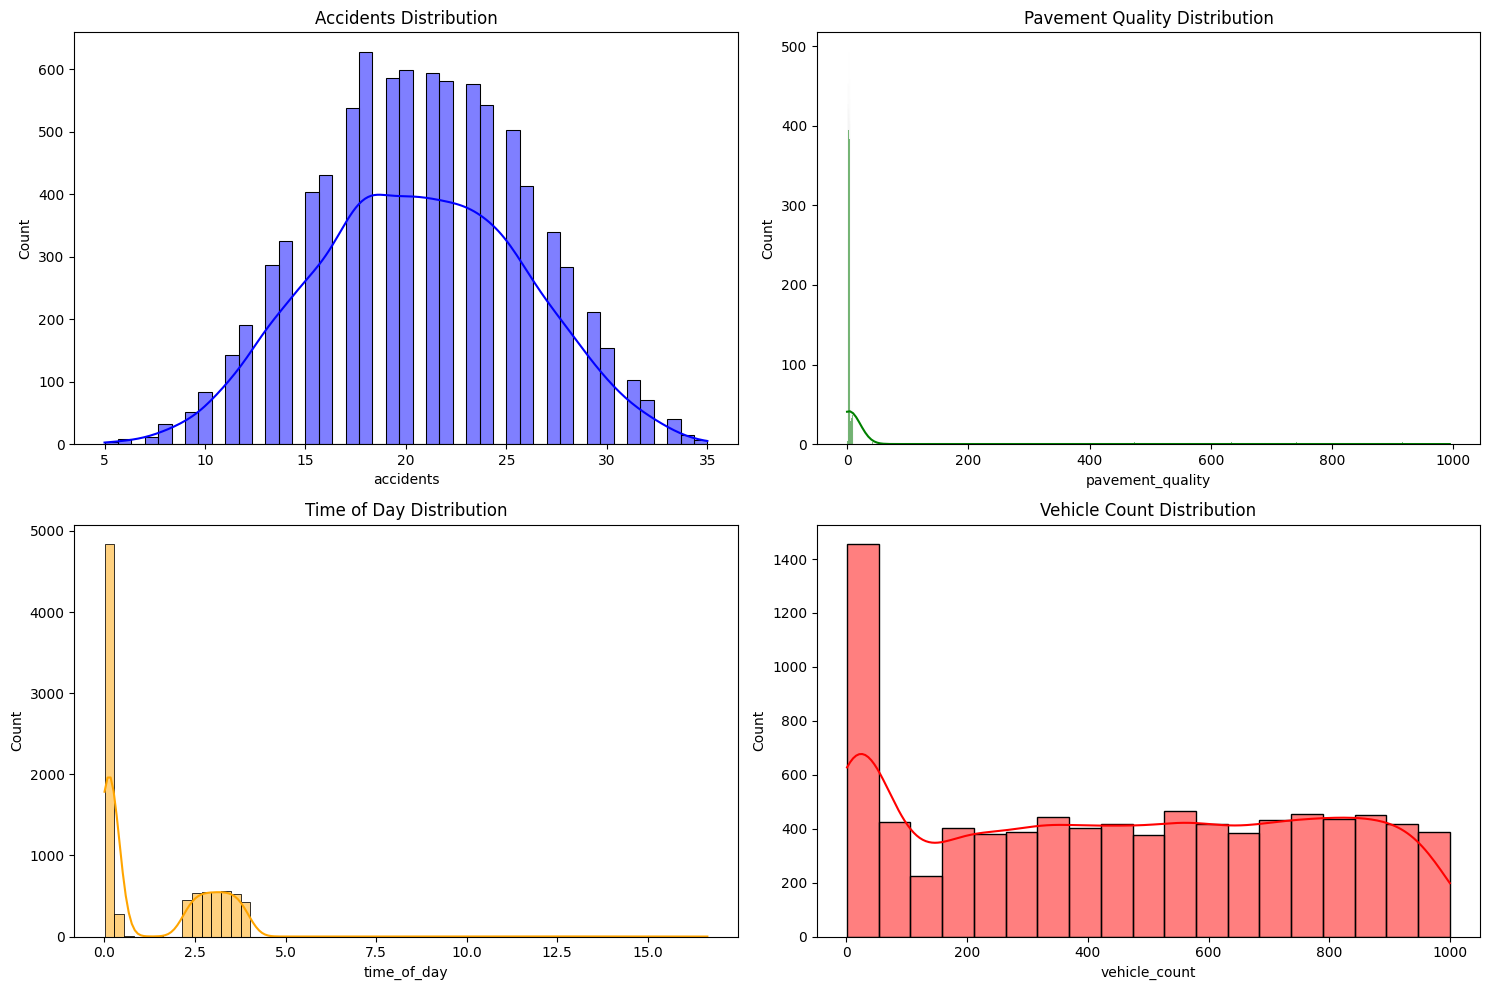

In [ ]:
# Setting the figure size for plots
plt.figure(figsize=(15, 10))

# Visualizing the distribution of certain columns with histograms
plt.subplot(2, 2, 1)
sns.histplot(data['accidents'], kde=True, color='blue')
plt.title('Accidents Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['pavement_quality'], kde=True, color='green')
plt.title('Pavement Quality Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['time_of_day'], kde=True, color='orange')
plt.title('Time of Day Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['vehicle_count'], kde=True, color='red')
plt.title('Vehicle Count Distribution')

plt.tight_layout()
plt.show()

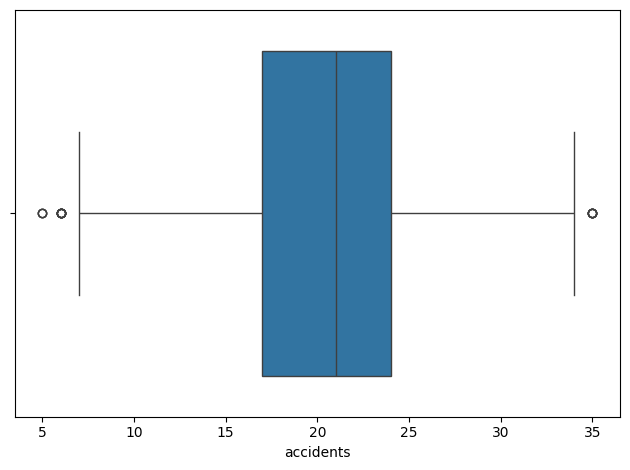

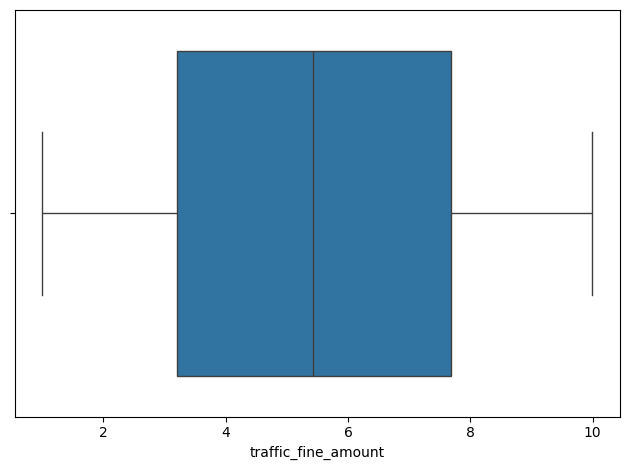

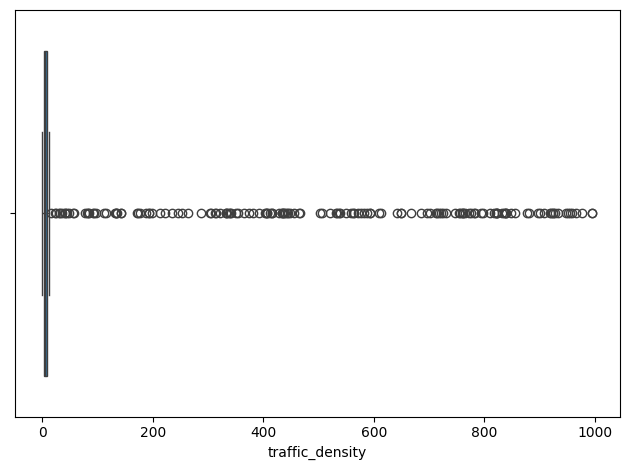

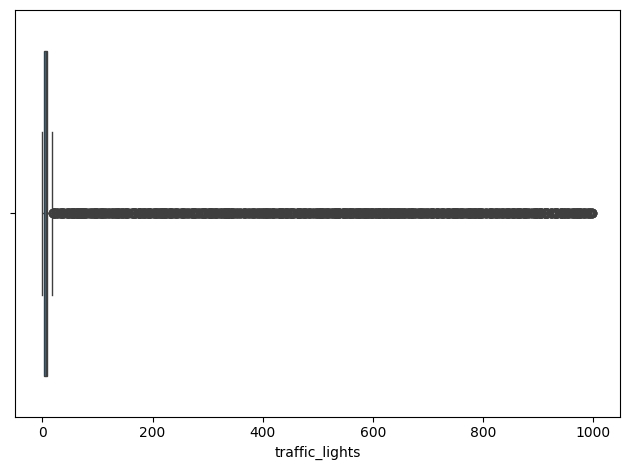

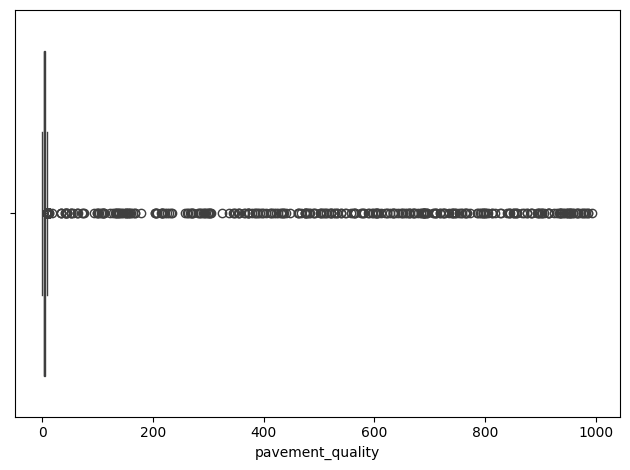

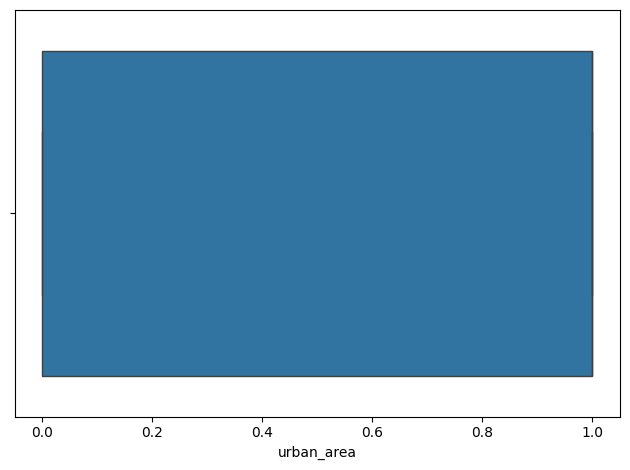

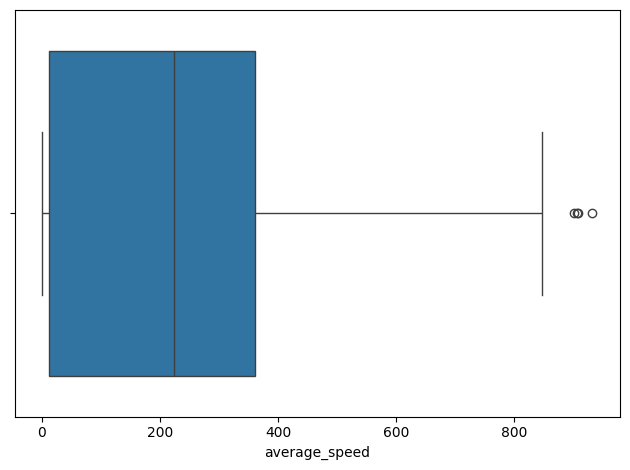

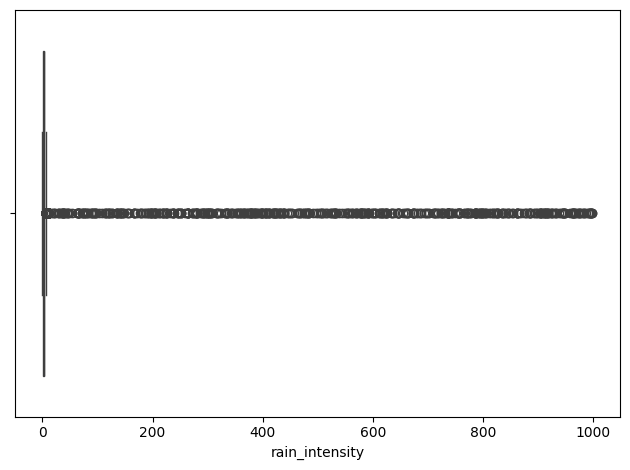

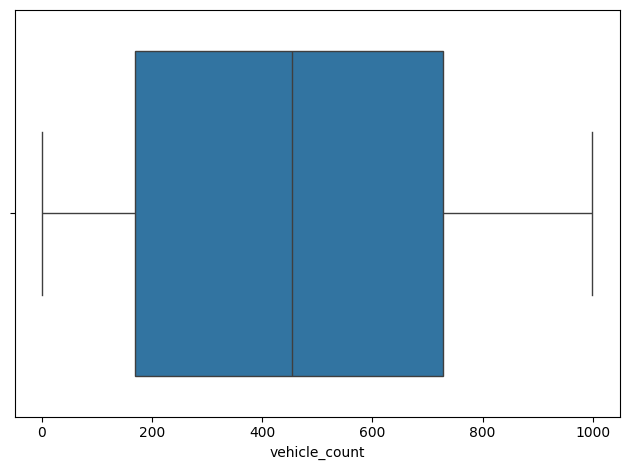

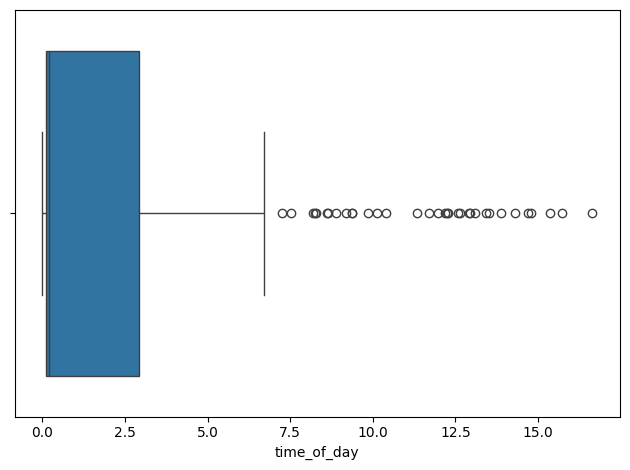

In [ ]:
for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data,x=i)
    plt.tight_layout()
    plt.show()


Bivariate/ Multivariate Analysis

In [ ]:
# Scatter plots to understand relationships

data.select_dtypes(include='number').columns

Index(['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_lights',
       'pavement_quality', 'urban_area', 'average_speed', 'rain_intensity',
       'vehicle_count', 'time_of_day'],
      dtype='object')

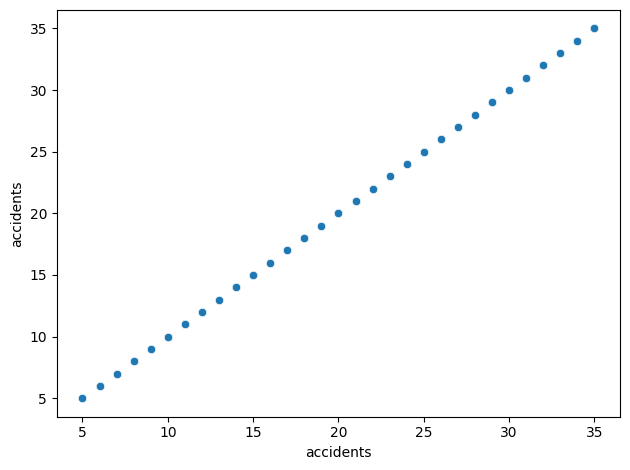

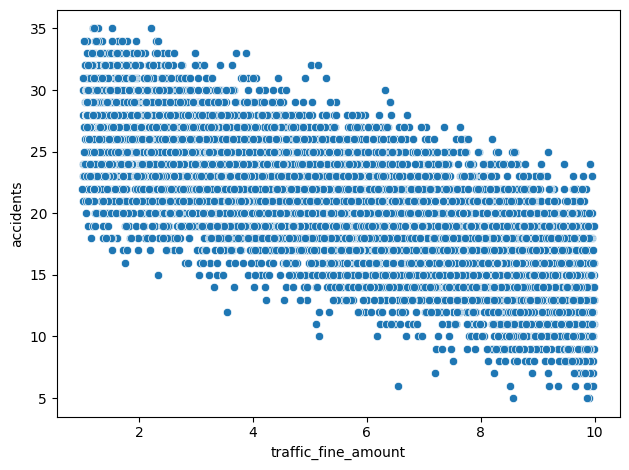

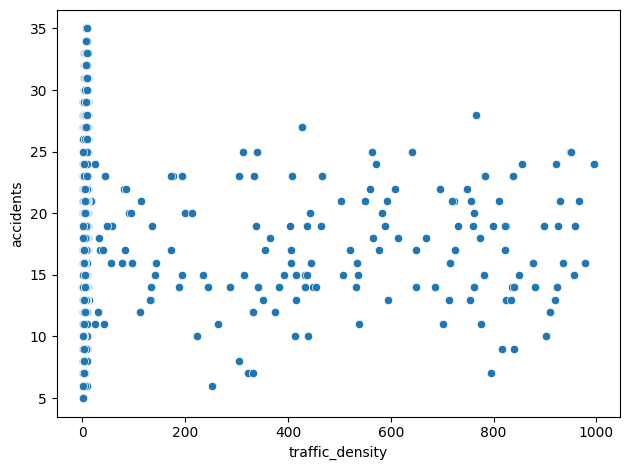

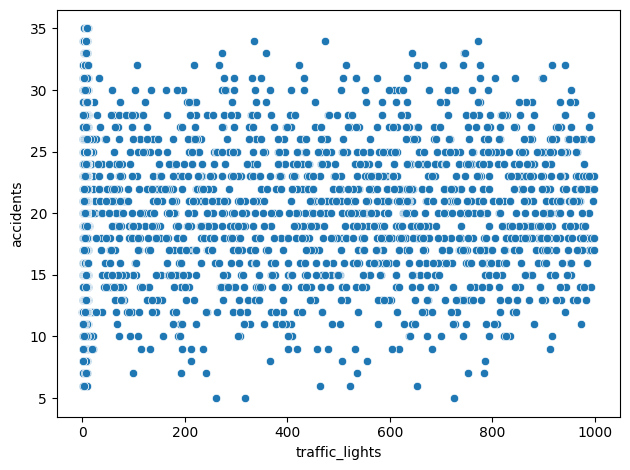

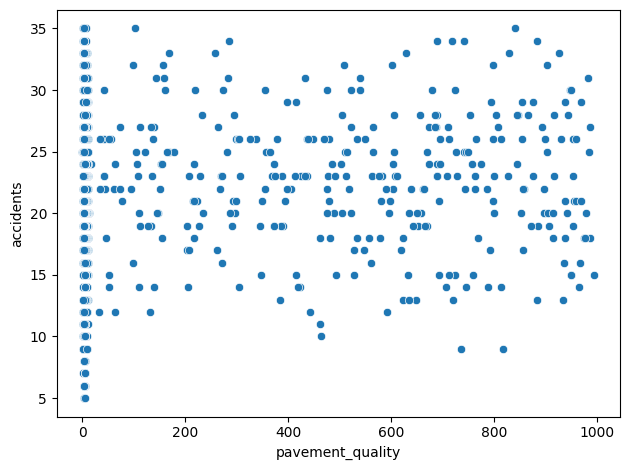

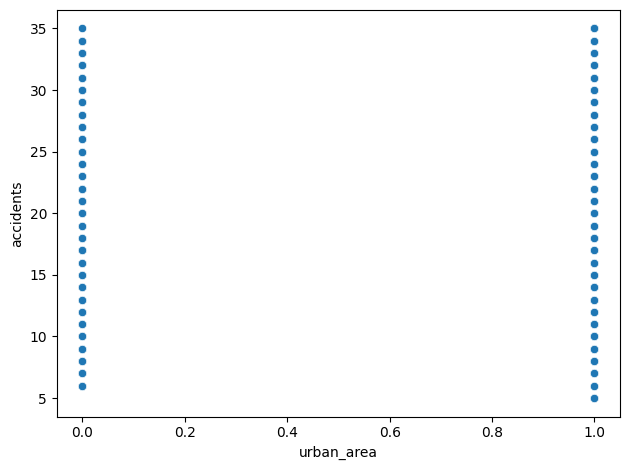

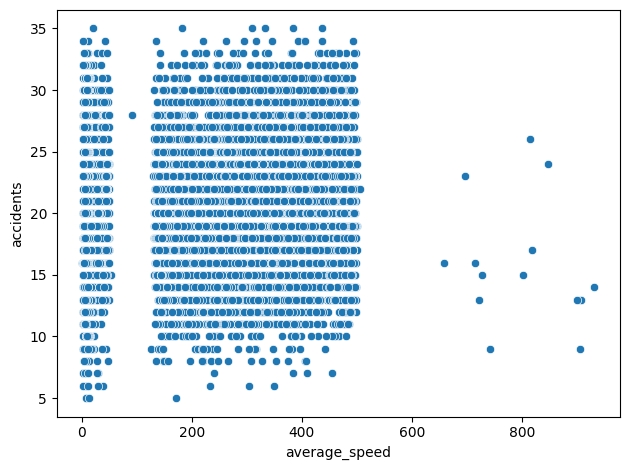

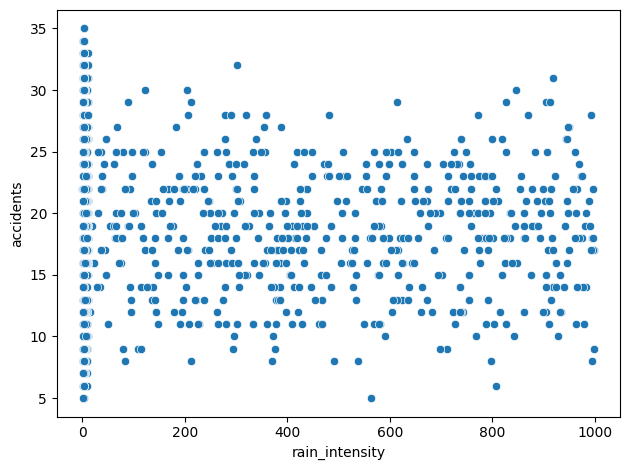

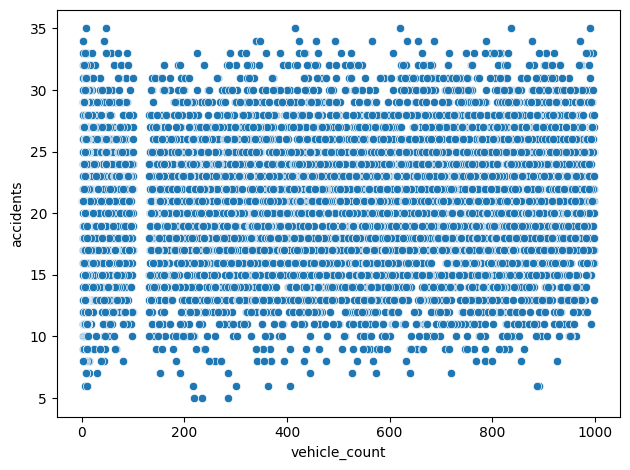

In [ ]:
for i in ['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_lights',
       'pavement_quality', 'urban_area', 'average_speed', 'rain_intensity',
       'vehicle_count']:
       sns.scatterplot(data=data,x=i,y='accidents')
       plt.tight_layout()
       plt.show()

In [ ]:
data.select_dtypes(include='number').corr()

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
accidents,1.000000,-0.745161,-0.059265,-0.026642,0.064694,0.145092,0.093923,-0.091673,0.068399,0.101995
traffic_fine_amount,-0.745161,1.000000,-0.004365,0.009056,-0.021229,-0.005136,0.009151,-0.015302,-0.016610,-0.006236
traffic_density,-0.059265,-0.004365,1.000000,0.033947,-0.000806,-0.001757,0.007829,-0.015466,-0.014244,0.002806
traffic_lights,-0.026642,0.009056,0.033947,1.000000,0.006334,0.001882,-0.000299,0.004228,0.001373,-0.001971
pavement_quality,0.064694,-0.021229,-0.000806,0.006334,1.000000,-0.012092,-0.001104,0.003338,0.007840,0.000055
urban_area,0.145092,-0.005136,-0.001757,0.001882,-0.012092,1.000000,0.006439,-0.006034,-0.006053,-0.006320
average_speed,0.093923,0.009151,0.007829,-0.000299,-0.001104,0.006439,1.000000,0.012119,0.000777,-0.005338
rain_intensity,-0.091673,-0.015302,-0.015466,0.004228,0.003338,-0.006034,0.012119,1.000000,-0.025933,-0.013446
vehicle_count,0.068399,-0.016610,-0.014244,0.001373,0.007840,-0.006053,0.000777,-0.025933,1.000000,-0.009303
time_of_day,0.101995,-0.006236,0.002806,-0.001971,0.000055,-0.006320,-0.005338,-0.013446,-0.009303,1.000000


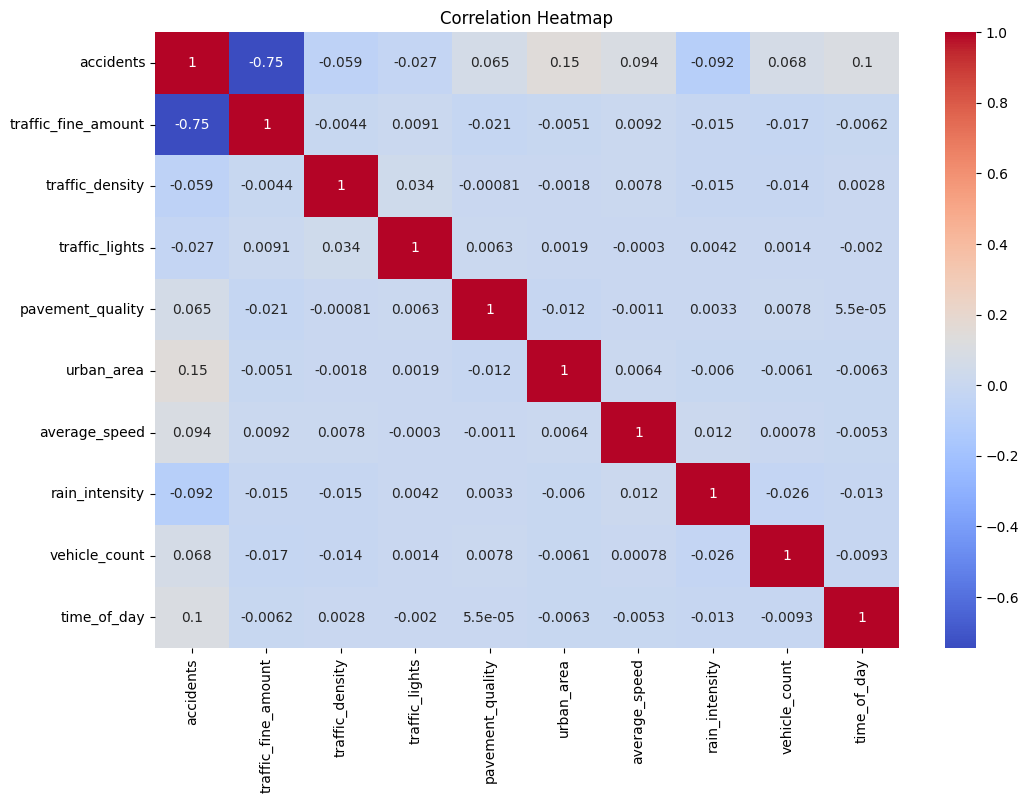

In [ ]:
# Correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

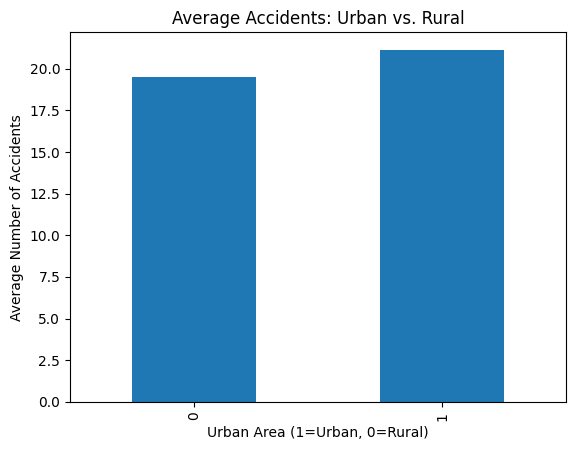

In [ ]:
# Accidents by Urban and Rural Areas
urban_trend = data.groupby('urban_area')['accidents'].mean()
urban_trend.plot(kind='bar', title='Average Accidents: Urban vs. Rural')
plt.xlabel('Urban Area (1=Urban, 0=Rural)')
plt.ylabel('Average Number of Accidents')
plt.show()



<ipython-input-124-c1a7768b8013>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_trend = data.groupby('time_bin')['accidents'].mean()


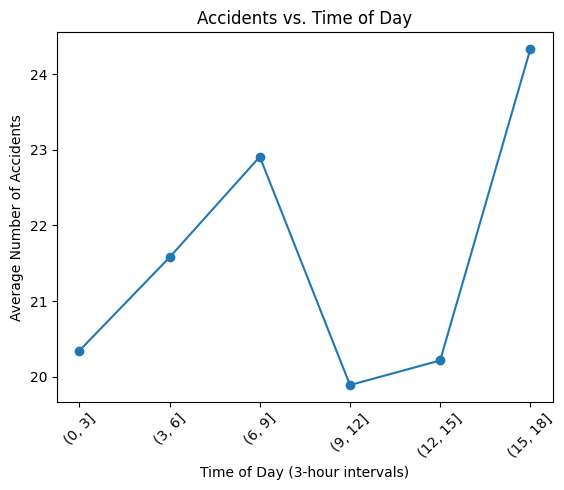

In [ ]:
# Accidents by Time of day
data['time_bin'] = pd.cut(data['time_of_day'], bins=range(0, 25, 3))  # 3-hour intervals
time_trend = data.groupby('time_bin')['accidents'].mean()
time_trend.plot(kind='line', marker='o', title='Accidents vs. Time of Day')
plt.xlabel('Time of Day (3-hour intervals)')
plt.ylabel('Average Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<ipython-input-118-32a40b0daac1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_trend = data.groupby(density_bins)['accidents'].mean()


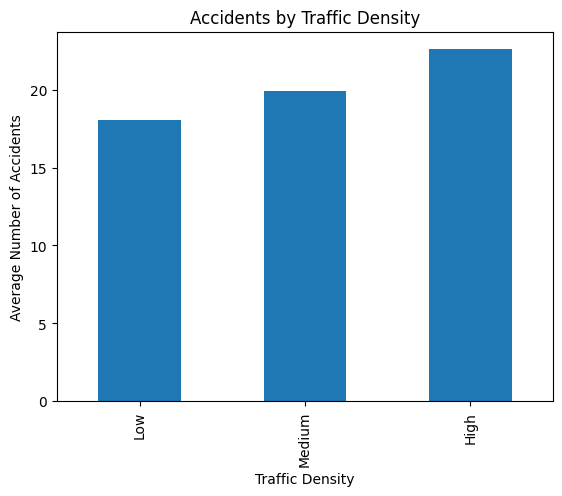

In [ ]:
# Accidents vs. Traffic Density
density_bins = pd.cut(data['traffic_density'], bins=[0, 3, 6, 10], labels=['Low', 'Medium', 'High'])
density_trend = data.groupby(density_bins)['accidents'].mean()
density_trend.plot(kind='bar', title='Accidents by Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Average Number of Accidents')
plt.show()

,accidents,rain_intensity
accidents,1.000000,-0.091673
rain_intensity,-0.091673,1.000000


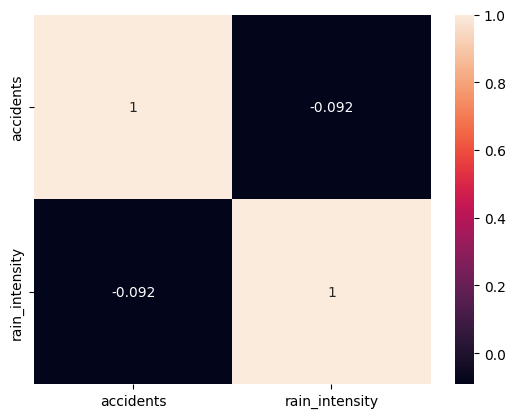

In [ ]:
# Effect of weather condition on accidents

data_corr= data[['accidents','rain_intensity']].corr()
sns.heatmap(data_corr,annot=True)
data_corr

The correlation is slightly negative (-0.092), meaning as rain intensity increases, accidents slightly decrease.
However, this correlation is very weak, indicating no strong relationship between these variables.

Possible Explanations:

a) When it rains, drivers may become more cautious, reducing speeds and increasing braking distances, leading to fewer accidents.

b) Some drivers may avoid driving in heavy rain, leading to lower accident numbers.


<Axes: >

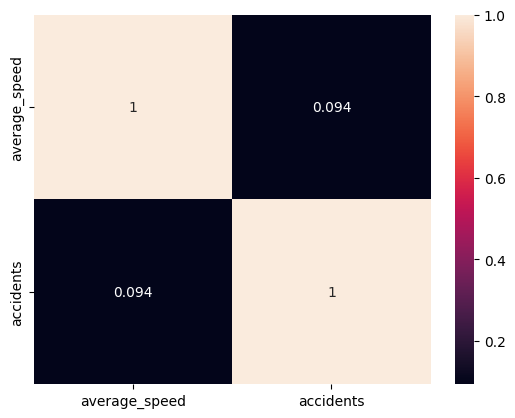

In [ ]:
# Effect of speed on accidents

data_corr1=data[["average_speed","accidents"]].corr()
data_corr1
sns.heatmap(data_corr1, annot=True)

<Axes: >

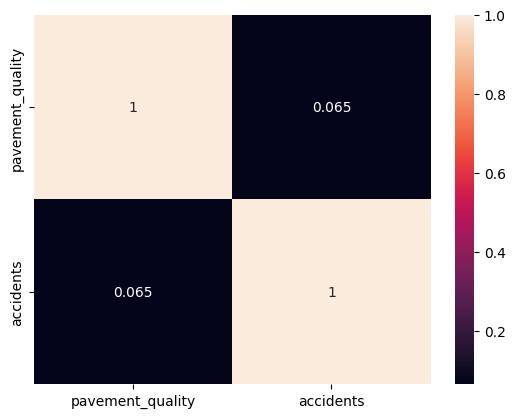

In [ ]:
# Effect of pavement quality on accidents

data_corr2=data[["pavement_quality",'accidents']].corr()
data_corr2
sns.heatmap(data_corr2, annot=True)

###Insights

- Roads with high traffic density experience the most accidents, suggesting congestion may increase accident risk.

- Rain intensity does not significantly influence accident frequency, possibly due to drivers adjusting their behavior during heavy rain (reducing speed, increasing caution).

- Accidents increase during the morning rush (6-9 AM), dip around midday (9-12 PM), and peak again in the evening (15-18 PM), likely due to traffic patterns.

- The urban area has a higher average number of accidents than rural areas which aligns with expectations, as urban areas typically have higher traffic volume, more intersections, and denser road networks, leading to more accidents.

- Several factors show weak correlations with accident frequency: urban areas (0.15), average speed (0.094), time of day (0.1), pavement quality (0.065), and vehicle count (0.068) all have slight positive associations with accidents suggesting that while these factors have some impact, accident rates are likely influenced by a combination of multiple interacting elements.


###Data-Driven Recommendations to Improve Road Safety

1. Higher speeds show a weak positive correlation with accidents (0.094).

Recommendation: Introduce speed cameras, stricter penalties for speeding, and increased enforcement of speed limits in accident-prone areas.

2. Time of day has a weak correlation with accidents (0.1).

Recommendation: Increase traffic patrols during peak accident hours (e.g., rush hours, nighttime) and enhance street lighting in accident-prone areas to improve nighttime visibility.

3. Pavement quality has a weak correlation with accidents (0.065).

Recommendation: Improving road infrastructure and pavement quality by repairing potholes and improving road surfacing in accident-prone areas.

4. More vehicles may slightly increase accident risk (0.068).

Recommendation: Encourage carpooling and public transport use to reduce congestion and implementing dedicated lanes for buses, motorcycles, and bicycles to improve traffic flow.

5. Accidents are slightly more common in urban areas (0.15 correlation).

Recommendation: Implement better traffic control measures such as intelligent traffic lights, stricter speed enforcement, and designated pedestrian crossings to reduce accident risk in urban centers

###Policy Changes Based on Findings

1. Implement lower speed limits in congested urban areas.

2. Increase fines and penalties for speeding violations and deploy automated speed monitoring systems.

3. Upgrading Road Infrastructure by setting minimum pavement quality standards for road construction and increasing budget allocations for road maintenance projects.

4. Mandate adaptive speed limits based on weather conditions.